In [7]:

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns;sns.set()

from matplotlib.font_manager import FontProperties

from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(data_home="C:\\Dev\\Python\\scikit_learn_data\\", min_faces_per_person=60)
print(faces.target_names)

print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


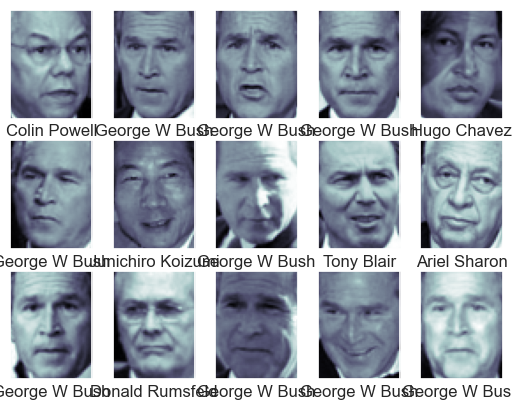

In [12]:
fig,ax = plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap="bone")

    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

plt.show()

In [11]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(faces.data,faces.target,random_state=42)
Xtrain

array([[0.41960785, 0.41830066, 0.42352942, ..., 0.41960788, 0.37124184,
        0.3895425 ],
       [0.34640524, 0.22091503, 0.21045752, ..., 0.82091504, 0.8248367 ,
        0.8300654 ],
       [0.53333336, 0.4797386 , 0.49542487, ..., 0.627451  , 0.654902  ,
        0.67843133],
       ...,
       [0.29673204, 0.20784314, 0.17124183, ..., 0.13725491, 0.2901961 ,
        0.32418302],
       [0.18039216, 0.3633987 , 0.4745098 , ..., 0.9895425 , 0.98692805,
        0.9777778 ],
       [0.62614375, 0.54771245, 0.5124183 , ..., 0.03398693, 0.04183007,
        0.03267974]], dtype=float32)

In [13]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150,whiten=True,random_state=42,svd_solver='randomized')

svc = SVC(kernel='rbf',class_weight='balanced')

model = make_pipeline(pca,svc)

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {"svc__C":[1,5,10,50],"svc__gamma":[0.0001,0.0005,0.001,0.005]}

grid = GridSearchCV(model,param_grid)
%time grid.fit(Xtrain,ytrain)
print(grid.best_params_)

CPU times: total: 1min 42s
Wall time: 27.9 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [16]:

model = grid.best_estimator_
model

Pipeline(steps=[('pca',
                 PCA(n_components=150, random_state=42, svd_solver='randomized',
                     whiten=True)),
                ('svc', SVC(C=5, class_weight='balanced', gamma=0.001))])

In [17]:
yfit = model.predict(Xtest)
yfit

array([3, 4, 3, 6, 6, 1, 3, 3, 3, 1, 3, 3, 0, 3, 2, 1, 7, 2, 3, 2, 7, 7,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 2, 2, 3, 2, 7, 3, 2, 3, 3, 7, 1,
       3, 3, 0, 2, 1, 2, 7, 3, 7, 6, 7, 3, 7, 1, 7, 0, 4, 2, 7, 2, 5, 4,
       7, 3, 4, 1, 1, 5, 4, 1, 3, 4, 0, 4, 3, 3, 1, 3, 1, 0, 3, 2, 3, 2,
       7, 1, 1, 1, 2, 7, 3, 7, 7, 3, 3, 1, 3, 7, 1, 4, 3, 3, 0, 3, 7, 0,
       3, 1, 0, 7, 7, 1, 3, 2, 7, 4, 7, 7, 5, 2, 3, 3, 3, 3, 2, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 2, 1, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 2, 7, 1,
       7, 1, 3, 0, 1, 4, 6, 1, 2, 3, 2, 3, 1, 7, 2, 2, 1, 7, 2, 3, 1, 1,
       1, 3, 3, 1, 0, 4, 1, 1, 7, 1, 1, 5, 3, 4, 3, 3, 7, 5, 6, 3, 7, 4,
       3, 2, 0, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 6, 3,
       1, 3, 4, 7, 7, 2, 7, 7, 5, 7, 1, 3, 3, 7, 4, 4, 7, 2, 3, 1, 3, 4,
       3, 1, 4, 3, 1, 1, 5, 1, 2, 3, 4, 1, 1, 1, 2, 2, 3, 7, 3, 7, 3, 7,
       3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 4, 4, 3, 1, 4, 1, 0, 0, 3, 2, 0,
       2, 5, 1, 3, 3, 6, 7, 2, 3, 6, 3, 1, 1, 5, 1,

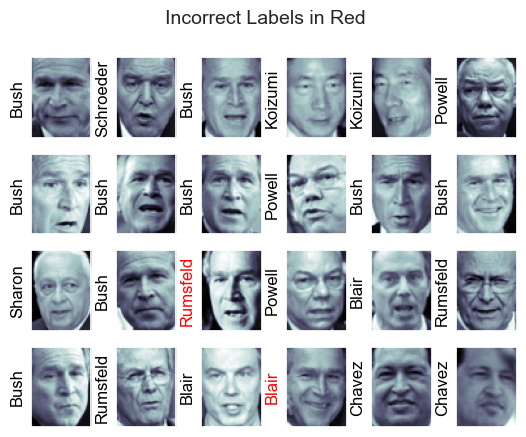

In [20]:
fig,ax = plt.subplots(4,6)

for i,axi in enumerate(ax.flat):

    axi.imshow(Xtest[i].reshape(62,47),cmap="bone")

    axi.set(xticks=[],yticks=[])

    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color="black" if yfit[i]==ytest[i] else "red")
fig.suptitle("Incorrect Labels in Red",size=14)
plt.show()

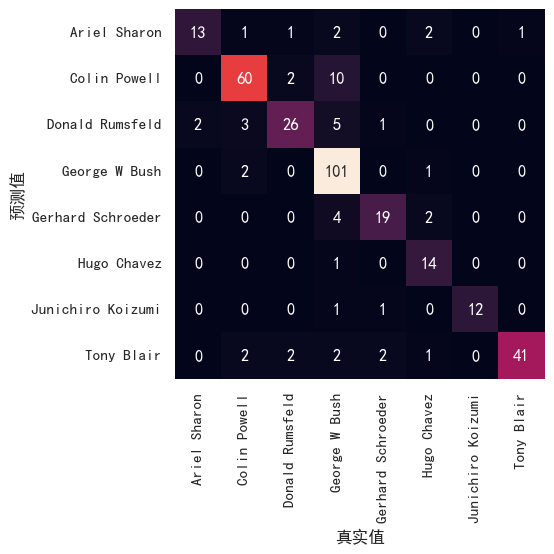

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,yfit)
sns.heatmap(mat.T,square=True,annot=True,fmt="d",cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.rcParams["font.family"]="SimHei"
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.show()